In [1]:
# todo readme.md


In [2]:
%load_ext tensorboard

import time
import itertools

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
from sklearn.model_selection import train_test_split
# noinspection PyUnresolvedReferences
from tensorflow.math import confusion_matrix
from keras.utils.np_utils import to_categorical



from digit_recognition.config import split_train, split_test, split_test_y_true
from digit_recognition.custom_funcs import transform_pred_data, \
    plot_confusion_matrix, plot_missclassified_images

In [3]:
df = pd.read_csv(split_train)
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33595,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33596,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33597,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33598,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
print(f'Missing valus: {df.isnull().any().sum()}')

Missing valus: 0


In [5]:
label = 'label'
X = df.drop(label, axis=1)
y = df[label]

C:\Users\patoj\anaconda3\envs\deep_learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

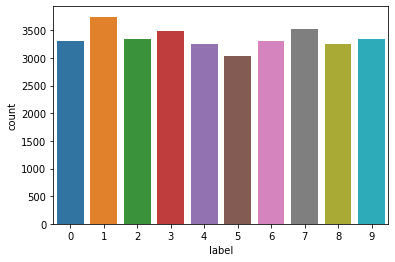

In [6]:
sns.countplot(y)

In [7]:

X  = X / 255
X = X.values.reshape(-1, 28, 28,1)

In [8]:
#  OneHot encoding y
print(y.shape)
classes = len(y.unique())
y = to_categorical(y, num_classes=classes)
print(y.shape)

(33600,)
(33600, 10)


Text(0.5, 1.0, 'This is [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]')

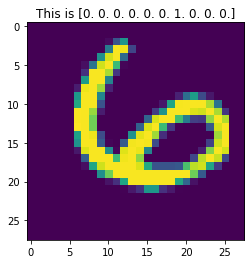

In [9]:
indx = 5
plt.imshow(X[indx])
plt.title(f'This is {y[indx]}')


In [10]:
X_train, X_val, y_train, y_val = train_test_split(
        X, y, test_size=0.2, random_state=42
)

In [11]:
NAME = f'LeNet {int(time.time())}'
tensorboard_callback = tf.keras.callbacks.TensorBoard(
    log_dir=f"logs/{NAME}")

print(NAME)

LeNet 1614077711


In [12]:
# Using LeNet 5 CNN architecture
model = keras.Sequential()

model.add(layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu',
                        input_shape=(28,28,1)))
model.add(layers.AveragePooling2D())

model.add(layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model.add(layers.AveragePooling2D())

model.add(layers.Flatten())

model.add(layers.Dense(units=120, activation='relu'))

model.add(layers.Dense(units=84, activation='relu'))

model.add(layers.Dense(units=10, activation = 'softmax'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 6)         60        
_________________________________________________________________
average_pooling2d (AveragePo (None, 13, 13, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 16)        880       
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

In [14]:
model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics='accuracy')

In [15]:
epochs = 10
model.fit(X_train, y_train, epochs=epochs, callbacks=[tensorboard_callback],
          validation_data=(X_val, y_val))


Epoch 1/10
840/840 [==============================] - 51s 37ms/step - loss: 0.7093 - accuracy: 0.8042 - val_loss: 0.1338 - val_accuracy: 0.9588

In [16]:
X_test = transform_pred_data(split_test)
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

(8400, 28, 28, 1)


In [17]:
y_true = np.array(pd.read_csv(split_test_y_true))
y_true

array([[1],
       [8],
       [6],
       ...,
       [7],
       [7],
       [1]], dtype=int64)

(8400, 1)
(8400,)
(8400, 28, 28, 1)


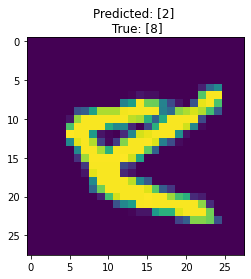

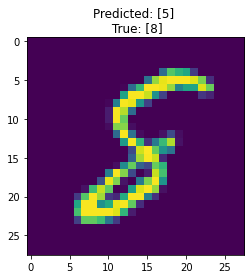

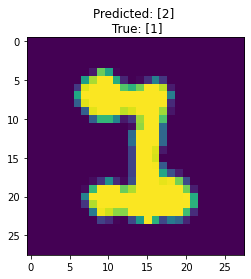

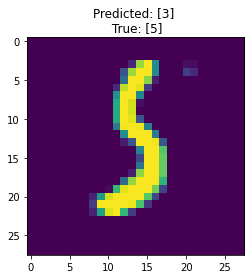

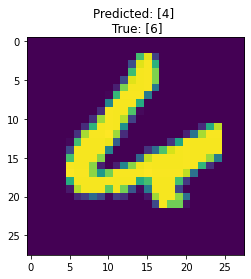

In [18]:
plot_missclassified_images(y_true, y_pred, X_test, n_images=5)

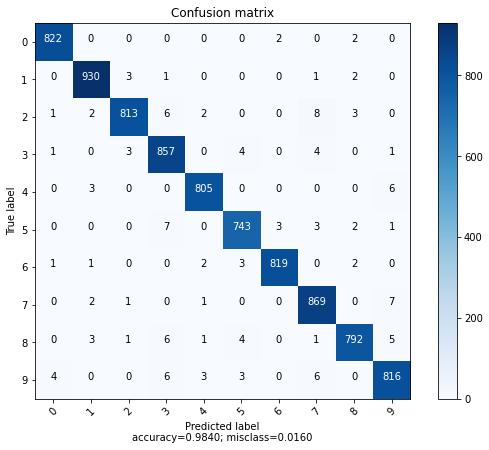

In [19]:
cm = confusion_matrix(y_true, y_pred)
cm = np.array(cm)

target_names = range(10)
plot_confusion_matrix(cm, target_names, normalize=False)
